# Voorspellen van credit card fraude
Een bekende dataset op Kaggle is de Credit Card Fraud Detection dataset. Je vindt meer informatie hierover via deze link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In deze opdracht gaan we weer aan de slag met deze dataset. Het doel is om zoveel mogelijk credit card fraude te herkennen, nu aan de hand van zogenaamde 'Tree Based' algoritmes.

- Voer onderstaande cel uit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1A Inlezen data
- Lees de data in creditcard.csv in als een dataframe

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MakeITWork/Week_10/creditcard.csv')

In [7]:
df.V14

0        -0.311169
1        -0.143772
2        -0.165946
3        -0.287924
4        -1.119670
            ...   
284802    4.626942
284803   -0.675143
284804   -0.510602
284805    0.449624
284806   -0.084316
Name: V14, Length: 284807, dtype: float64

## 2 Decision Tree

### 2A train-test plit
- Splits de data in X en y
- Splits de data in trainsets en testsets

In [8]:
X = df.drop('Class', axis = 1)
y = df['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y,  random_state=42)

### 2B Decision Tree algoritme uitvoeren
- Pas de decision tree module toe van sklearn op de trainingsdata.
- Maak hiermee voorspellingen voor de testset.


In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

## 3 Metrics

### 3A Confusion matrix
- Gebruik sklearn om een confusion matrix te maken.
- Wijs de confusion matrix toe aan de variabele cm en toon de confusion matrix
- Gebruik ConfusionMatrixDisplay om een gekleurd overzicht van de matrix te maken.

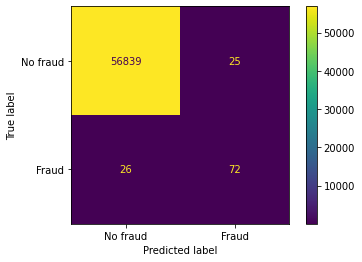

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No fraud','Fraud'])
cmd.plot()
plt.show()

### 3B Classification report
- Toon het classification report.
- Vergelijk dit met de beste uitkomst van de Logistic Regression opdracht, zoals hieronder getoond. Welk model verdient de voorkeur? Waarom?
![image-2.png](attachment:image-2.png)



In [11]:
#Vergelijking: if the target is reducing false negative ( no fraud ) amount then decision tree is doing a better job but if the aim is also not blaming innocent people with fraud then i d go with logistic regression
# ensemble would be a better choice maybe
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.73      0.74      0.74        97

    accuracy                           1.00     56962
   macro avg       0.87      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962



## 4 Decision tree: terminologie


### 4A Printen decision tree
- Train een nieuwe decision tree maar nu met max_depth = 3.
- Print de decision tree met de plot_tree functie van sklearn.tree

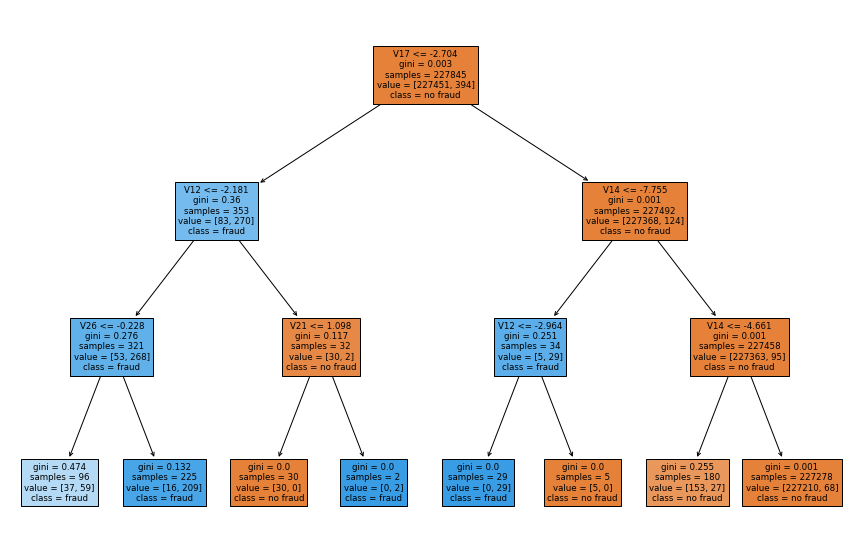

In [12]:
dt3 = DecisionTreeClassifier(max_depth = 3)
dt3.fit(X_train, y_train)

from sklearn.tree import plot_tree
plt.figure(figsize = (15, 10))
plot_tree(dt3, feature_names = X.columns, filled = True, class_names=["no fraud", "fraud"])
plt.show()


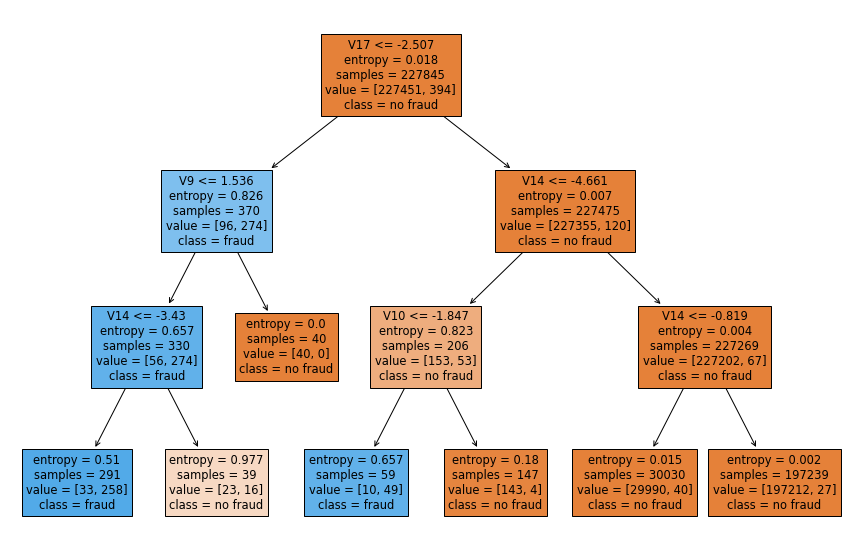

In [13]:
ent_tree = DecisionTreeClassifier(max_depth = 3, criterion="entropy")
ent_tree.fit(X_train, y_train)

plt.figure(figsize = (15, 10))
plot_tree(ent_tree, feature_names = X.columns, filled = True, class_names=["no fraud", "fraud"])
plt.show()

### 4B: Decision tree terminologie
- Geef de definities van de onderstaande termen.

In [14]:
#Root = this one has no prior nodes ( the first node ) V17
#branch = these have a parent node and a leaf 3rd row (V26, V21, V7, V14)
#Internal node = one parent node and no leaves(might have other internal nodes or branches depending on the depth)(V12, V14)
#leaf = last nodes with one parent node and no children nodes.

### 4C Information Gain
- Leg uit wat information gain is in de context van decision trees. 
- Welke maatstaf voor information gain wordt in dit geval gebruikt?

In [15]:
# Information gain = 
"""Information gain is a measure used in decision tree building to determine how useful a feature is in classifying a dataset. 
It calculates the difference in uncertainty (entropy) of the dataset before and after splitting based on a certain feature. 
The goal is to find the feature that results in the greatest reduction in uncertainty and use it to split the dataset first.

The typical information gain measure is corrected to account for the effects of the number of available samples and the class ratios,
making the model better at building decision trees that are tailored to the specific characteristics of the dataset.
"""

'Information gain is a measure used in decision tree building to determine how useful a feature is in classifying a dataset. \nIt calculates the difference in uncertainty (entropy) of the dataset before and after splitting based on a certain feature. \nThe goal is to find the feature that results in the greatest reduction in uncertainty and use it to split the dataset first.\n\nThe typical information gain measure is corrected to account for the effects of the number of available samples and the class ratios,\nmaking the model better at building decision trees that are tailored to the specific characteristics of the dataset.\n'

### 4D Tree uitleggen
- Leg in eigen woorden uit hoe de decision tree wordt opgebouwd. Maak hierbij gebruik van de termen die je ziet in de print van de decision tree (features, splitsingscriteria, gini, samples, values).

In [16]:
# At the first node, root ( V17 ) the feature with highest info gain the tree is split to 2, lower than or equal to -2.704 one internal node and the rest is another internal node
# then these 2 nodes are also split to two so 4 nodes accordingly
# next 2 branches are 3rd depth go further splitting to 8
# last remaning ones are the leaves and is also the models decision at this depth.

### 4E Leaves
- Hoeveel leaves heeft deze decision tree? Hoe herken je deze?

In [17]:
# Aantal leaves: 8. Deze hebben condities meer en ook zijn de laatste nodes van de decision tree.

### 4F Decision boundary
- De decision boundary van een decision tree is anders dan die van logistic regression. Leg uit wat het verschil is. Toon hiervan een visualisatie (bijvoorbeeld uit datacamp).

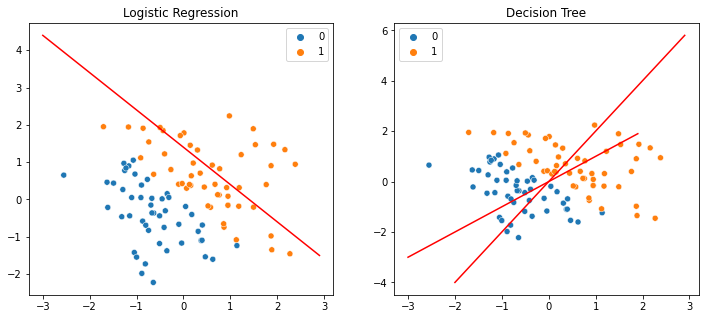

In [18]:
# A decision boundary in decision trees and logistic regression are different. 
# The decision boundary in a decision tree is created by splitting the dataset based on the features and their thresholds, whereas in logistic regression it is defined by a linear equation.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# generate data
np.random.seed(0)
X = np.random.normal(size=(100, 2))
y = (X[:, 0] + X[:, 1] > 0).astype(int)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax2)

# decision boundary for logistic regression
w = np.array([0.5, 0.5])
b = -0.7
x_range = np.arange(-3, 3, 0.1)
ax1.plot(x_range, -(w[0]*x_range + b)/w[1], label='Logistic Regression', color='red')

# decision boundary for decision tree
x_range = np.arange(-3, 2, 0.1)
ax2.plot(x_range, x_range, label='Decision Tree', color='red')
x_range = np.arange(-2, 3, 0.1)
ax2.plot(x_range, 2*x_range, label='Decision Tree', color='red')

ax1.set_title('Logistic Regression')
ax2.set_title('Decision Tree')

plt.show()



#### Plaatje:




### 5a Variance / Bias
- Leg uit wat 'variance' en'bias' is.
- Geef bij ieder aan of er sprake is van overfitting of underfitting.
- Geef voor ieder aan wat de beste aanpak is om het op te verminderen.

In [ ]:
#high bias = that indicates low accuracy this is underfittting
#solution: finding the lowest generation error possible with increasing complexity and tune it for bias and variance for the model.
#high variance = high std, samples are spread out this is overfitting
#solution: see first solution

- Bias: Bias refers to the systematic error or deviation in the model's predictions. A high bias model is one that is too rigid and makes the same prediction for all inputs, regardless of their differences. This often leads to underfitting, where the model fails to capture the complexity of the data and cannot accurately fit the training data.

- Solution for high bias: To reduce the bias of a model, one can:

  - Use a more complex model with additional features
  - Decrease the regularization strength to allow the model to better fit the data
  - Try different algorithms or architectures to better match the data's structure
  - Gather additional relevant features to provide the model with more information to make accurate predictions.


- Variance: Variance refers to the amount of uncertainty or unpredictability in the model's predictions. A high variance model is one that is too sensitive to small fluctuations in the training data and changes its predictions greatly for different training sets. This often leads to overfitting, where the model fits the training data too closely and fails to generalize to new, unseen data.

- Solution for high variance: To reduce the variance of a model, one can:

  - Use a simpler model with fewer features
  - Use regularization techniques, such as L1 or L2 regularization, to penalize 
high-variance model parameters
  - Use early stopping to prevent overfitting during training
  - Gather more training data to reduce the influence of noise in the data

### 5b Variance & bias voor decision trees
- Beschrijf aan de hand van het classification report hoe goed de decision tree is die we hebben gebruikt. Gebruik daarbij de volgende terminologie: bias, variance, overfitting, underfitting.
- Probeer ook uit wat er gebeurt bij een max_depth van 20 en van 10. Wordt het model hierdoor beter?

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# cross-validation
scores = cross_val_score(tree, X_train, y_train, cv=10)

print("Mean accuracy: {:.2f}%".format(scores.mean()*100))
print("Standard deviation: {:.2f}%".format(scores.std()*100))

# classification report for one of the folds
y_pred = tree.predict(X_train)
print(classification_report(y_train, y_pred))


"""
Increasing max_depth can increase the model's complexity, reducing bias and increasing variance, 
while decreasing max_depth can reduce variance and increase bias. 

According to these results, it is low bias and low variance so it lookslike model is wel fit to data.

"""

Mean accuracy: 99.91%
Standard deviation: 0.02%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



"\nIncreasing max_depth can increase the model's complexity, reducing bias and increasing variance, \nwhile decreasing max_depth can reduce variance and increase bias. \n\nAccording to these results, it is low bias and low variance so it lookslike model is wel fit to data.\n\n"

In [25]:
# max_depth = 20:
dt1 = DecisionTreeClassifier(max_depth = 20)
dt1.fit(X_train, y_train)
dt1_pred = dt1.predict(X_test)

scores = cross_val_score(dt1, X_train, y_train, cv=10)

print("Max depth = 20")
print("Mean accuracy: {:.2f}%".format(scores.mean()*100))
print("Standard deviation: {:.2f}%\n".format(scores.std()*100))

print(classification_report(y_test, dt1_pred))

Max depth = 20
Mean accuracy: 99.91%
Standard deviation: 0.01%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.73      0.74        98

    accuracy                           1.00     56962
   macro avg       0.87      0.87      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# max_depth = 10:
dt2 = DecisionTreeClassifier(max_depth = 10)
dt2.fit(X_train, y_train)
dt2_pred = dt2.predict(X_test)

scores = cross_val_score(dt2, X_train, y_train, cv=10)

print("Max depth = 10")
print("Mean accuracy: {:.2f}%".format(scores.mean()*100))
print("Standard deviation: {:.2f}%\n".format(scores.std()*100))

print(classification_report(y_test, dt2_pred))

Max depth = 10
Mean accuracy: 99.94%
Standard deviation: 0.01%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.73      0.80        98

    accuracy                           1.00     56962
   macro avg       0.94      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



## 6 Entropy & Cross validation


### 6a Entropy
Hierboven heb je als het goed is ontdekt dat bij een max_depth van 10 de f1-score verbetert. We gaan nu kijken wat er gebeurt als we in plaats van Gini een andere maatstaf gaan gebruiken om de decision tree op te bouwen.
- Train een nieuwe decision tree classifier met een max_depth van 10 en als maatstaf 'entropy'.
- Maak een classification report voor de test set en voor de train set.
- Beoordeel of het model verbetert of juist niet.

In [22]:
dt_entropy = DecisionTreeClassifier(max_depth=10, criterion='entropy')
dt_entropy.fit(X_train, y_train)

y_pred_train = dt_entropy.predict(X_train)
y_pred_test = dt_entropy.predict(X_test)

print("Train Set:")
print(classification_report(y_train, y_pred_train))

print("Test Set:")
print(classification_report(y_test, y_pred_test))

#entropy geeft een hogere f1 score, dus beter but the train set is still higher than the test set

Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.91      0.95       394

    accuracy                           1.00    227845
   macro avg       1.00      0.95      0.98    227845
weighted avg       1.00      1.00      1.00    227845

Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### 6b Cross validation
We hebben nu het vermoeden dat 'entropy' beter werkt dan 'Gini' en dat bij een max_depth van 10 het model behoorlijk goed presteert. We gaan nu beoordelen of dit (deels) komt door een toevallig gunstige train-test split of dat het model ook bij andere train-test splits goed presteert. Overigens gaan we later kijken hoe we modellen nog beter kunnen 'tunen'.
- Voer 10-fold cross-validation uit op het laatste model (entropy en max_depth = 10)
- Wat is de gemiddelde f1-score? Wat zegt dit over generaliseerbaarheid?

In [29]:
from sklearn.model_selection import cross_val_score

f1_scores = cross_val_score(dt_entropy, X, y, cv=12, scoring='f1')
average_f1_score = f1_scores.mean()

print(average_f1_score)

# A mean f1-score of 0.80 indicates that the model is likely performing well on the unseen data, or in other words, it is generalizing well.
# A high f1-score indicates a good balance between precision and recall, meaning that the model is making accurate predictions and not missing too many instances
# or marking too many instances as positive. So, a mean f1-score of 0.80 implies that the model has a good level of generalization and is making predictions with good accuracy

0.9069444444444444


## 7 Ensembles

### 7a Ensemble van logistic regression en decision trees
- Importeer de logistic regression module en de voting classifier van sklearn.
- Wijs een waarde toe aan SEED.

In [30]:
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
SEED = 0

- Maak de variabele lr waaraan je Logistic Regression toewijst met de volgende parameters: C = 1000, max_iter = 1000 en random_state = SEED.
- Maak de variabele dt_gini waaraan de Decision Tree Classifier toewijst met de volgende parameters: criterion = 'gini' , max_depth = 10, random_state = SEED.
- Maak de variabele dt_entropy waaraan de Decision Tree Classifier toewijst met de volgende parameters: criterion = 'entropy' , max_depth = 10, random_state = SEED.    

In [31]:
lr = LogisticRegression(C=1000, max_iter=1000, random_state=SEED)

dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=SEED)

dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=SEED)

- Maak de list classifiers met daarin tuples van de omschrijving van de modellen en bijbehorende variabele namen.
- Loop over deze list waarbij je het volgende doet:
    - Model fitten
    - Voorspellingen maken
    - Beoordelen op basis van de test data aan de hand van het classification report.

In [32]:
#Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [
    ('Logistic Regression', lr),
    ('Decision Tree (Gini)', dt_gini),
    ('Decision Tree (Entropy)', dt_entropy)
]

# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Classification report for {clf_name}:")
    print(classification_report(y_test, y_pred))

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.70      0.76        98

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Classification report for Decision Tree (Gini):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.73      0.80        98

    accuracy                           1.00     56962
   macro avg       0.94      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Classification report for Decision Tree (Entropy):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.83      0.84        98

    accuracy                        

### 7b Toepassen voting classifier
- Initialiseer een voting classifier waarin je de waardes uit de classifiers list gebruikt.
- Fit deze voting classifier met de train data.
- Voorspel de labels voor de test data.
- Maak een classification report voor de test data.
- In hoeverre is dit model beter dan de individuele classifiers?

In [37]:
test = (("a",lr),("b",dt_gini), ("c",dt_entropy))

# Instantiate a VotingClassifier 'vc'
voting_clf = VotingClassifier(estimators=test)

# Fit 'vc' to the traing set and predict test set labels
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("Voting Classifier")
print(classification_report(y_test, y_pred))

# Evaluate the test-set f1 score
from sklearn.metrics import f1_score
y_pred = voting_clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("f1-score: {:.3f}".format(f1))

#f1 score is beter dan het beste individuele model, dus werkt goed.

Voting Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

f1-score: 0.863
